# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [3]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

print("Beginning Data Retrieval")
print("------------------------------")


country_name = []
counter = 0
city_id = []
city_list = []
cloud=[]
date=[]
humid=[]
latt=[]
long=[]
max_t=[]
windy=[]
group=1

for city in cities:
    city_url=f'{base_url}q={city}&appid={weather_api_key}'
    responses_1=requests.get(city_url)
    response=responses_1.json()
    counter=counter+1
    try:
        city_list.append(response['name'])
        latt.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_t.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windy.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
                     
        if counter>50:
            counter=1
            group=1+group
        
        print(f'Processing record {counter} of set {group} in {city}')
    
    except: 
        print("City not found.") 
        pass

Beginning Data Retrieval
------------------------------
Processing record 1 of set 1 in chuy
Processing record 2 of set 1 in longyearbyen
Processing record 3 of set 1 in honningsvag
Processing record 4 of set 1 in ribeira grande
Processing record 5 of set 1 in ushuaia
Processing record 6 of set 1 in carutapera
Processing record 7 of set 1 in mataura
Processing record 8 of set 1 in nantucket
Processing record 9 of set 1 in victoria
Processing record 10 of set 1 in rairangpur
Processing record 11 of set 1 in vila velha
Processing record 12 of set 1 in rikitea
Processing record 13 of set 1 in inhambane
Processing record 14 of set 1 in whitehorse
Processing record 15 of set 1 in muli
Processing record 16 of set 1 in albany
Processing record 17 of set 1 in upernavik
Processing record 18 of set 1 in port alfred
Processing record 19 of set 1 in dandong
Processing record 20 of set 1 in kaitangata
Processing record 21 of set 1 in barrow
Processing record 22 of set 1 in caidian
Processing record

Processing record 4 of set 5 in ahuimanu
Processing record 5 of set 5 in krasnoselkup
Processing record 6 of set 5 in avarua
Processing record 7 of set 5 in katsuura
Processing record 8 of set 5 in singkang
Processing record 9 of set 5 in saint-francois
City not found.
Processing record 11 of set 5 in fortuna
Processing record 12 of set 5 in paragominas
Processing record 13 of set 5 in hervey bay
Processing record 14 of set 5 in codrington
Processing record 15 of set 5 in jiexiu
Processing record 16 of set 5 in fairbanks
Processing record 17 of set 5 in souillac
Processing record 18 of set 5 in torbay
Processing record 19 of set 5 in bambous virieux
Processing record 20 of set 5 in grindavik
Processing record 21 of set 5 in mandalgovi
Processing record 22 of set 5 in gorontalo
Processing record 23 of set 5 in butaritari
Processing record 24 of set 5 in iqaluit
Processing record 25 of set 5 in general roca
Processing record 26 of set 5 in beberibe
Processing record 27 of set 5 in warri


Processing record 9 of set 9 in lata
Processing record 10 of set 9 in dutse
Processing record 11 of set 9 in bumba
Processing record 12 of set 9 in balotra
Processing record 13 of set 9 in kiunga
Processing record 14 of set 9 in sao joao da barra
City not found.
Processing record 16 of set 9 in boulder
Processing record 17 of set 9 in ayan
Processing record 18 of set 9 in hamilton
City not found.
Processing record 20 of set 9 in santa maria
Processing record 21 of set 9 in shingu
Processing record 22 of set 9 in carlyle
Processing record 23 of set 9 in faanui
Processing record 24 of set 9 in victor harbor
Processing record 25 of set 9 in clyde river
Processing record 26 of set 9 in brae
Processing record 27 of set 9 in nazarovo
Processing record 28 of set 9 in flin flon
Processing record 29 of set 9 in ostrovnoy
Processing record 30 of set 9 in uvinza
Processing record 31 of set 9 in batemans bay
Processing record 32 of set 9 in urumqi
Processing record 33 of set 9 in husavik
Processin

Processing record 7 of set 13 in la troncal
Processing record 8 of set 13 in takoradi
Processing record 9 of set 13 in cockburn town
Processing record 10 of set 13 in port-cartier
Processing record 11 of set 13 in talara
Processing record 12 of set 13 in almansa
Processing record 13 of set 13 in pangnirtung
Processing record 14 of set 13 in archidona
Processing record 15 of set 13 in vao
Processing record 16 of set 13 in posse
Processing record 17 of set 13 in kinkala
City not found.
Processing record 19 of set 13 in hambantota
Processing record 20 of set 13 in puerto castilla
Processing record 21 of set 13 in svetlyy
Processing record 22 of set 13 in bar harbor
Processing record 23 of set 13 in awjilah
Processing record 24 of set 13 in chifeng
Processing record 25 of set 13 in gushikawa
Processing record 26 of set 13 in cam ranh
Processing record 27 of set 13 in menongue
Processing record 28 of set 13 in ternate
City not found.
Processing record 30 of set 13 in collie
Processing recor

In [15]:
data_dict = {"City":city_list,
             "Lat":latt,
             "Lng":long,
             "Max Temp":max_t,
             "Humidity":humid,
             "Cloudiness":cloud,
             "Wind Speed":windy,
             "Country":country_name,
             "Date":date}

weather_df= pd.DataFrame(data_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,294.85,89,100,4.96,UY,1612054027
1,Longyearbyen,78.2186,15.6401,253.15,65,20,8.75,SJ,1612054027
2,Honningsvåg,70.9821,25.9704,270.15,80,0,3.60,NO,1612053848
3,Ribeira Grande,38.5167,-28.7000,290.44,91,94,9.74,PT,1612053830
4,Ushuaia,-54.8000,-68.3000,284.15,62,20,9.77,AR,1612054021


In [16]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,20.385445,19.849207,282.039336,73.775128,51.858603,3.695468,1.612054e+09
std,32.841074,89.878338,18.197975,18.810548,41.841266,2.644438,9.755382e+01
min,-54.800000,-179.166700,229.250000,1.000000,0.000000,0.050000,1.612053e+09
25%,-5.166800,-57.690950,270.150000,64.000000,1.000000,1.540000,1.612054e+09
50%,24.093400,24.666700,289.140000,78.000000,60.000000,3.090000,1.612054e+09
75%,47.875950,100.492550,296.995000,87.000000,97.500000,5.070000,1.612054e+09
max,78.218600,179.316700,308.150000,100.000000,100.000000,14.920000,1.612054e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
humidity_filter=weather_df.loc[:,'Humidity']<=100
new_weather_df=weather_df.loc[humidity_filter,:]
new_weather_df.head()
new_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,20.385445,19.849207,282.039336,73.775128,51.858603,3.695468,1.612054e+09
std,32.841074,89.878338,18.197975,18.810548,41.841266,2.644438,9.755382e+01
min,-54.800000,-179.166700,229.250000,1.000000,0.000000,0.050000,1.612053e+09
25%,-5.166800,-57.690950,270.150000,64.000000,1.000000,1.540000,1.612054e+09
50%,24.093400,24.666700,289.140000,78.000000,60.000000,3.090000,1.612054e+09
75%,47.875950,100.492550,296.995000,87.000000,97.500000,5.070000,1.612054e+09
max,78.218600,179.316700,308.150000,100.000000,100.000000,14.920000,1.612054e+09


In [18]:
new_weather_df.to_csv('../output_data/weather_data.csv')

In [19]:

humidity_over_filter=weather_df.loc[:,'Humidity']>100
weather_over_df=weather_df.loc[humidity_over_filter,:]
list(weather_over_df.index)
weather_over_df.index

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot below displays max temperatures in relationship 
to city latitude. From this visual, we can conclude that the 
cities closer to the equator (0 degrees latitude) reach higher 
max temperatures.


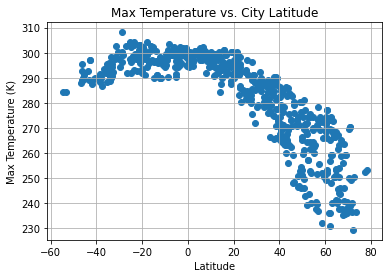

In [22]:
x_lat=new_weather_df['Lat']
y_maxtemp=new_weather_df['Max Temp']

plt.scatter(x_lat,y_maxtemp)
plt.title('Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.savefig('../output_data/MaxTemp_Lat_Scatter.png')

print(f'The plot below displays max temperatures in relationship \nto city latitude. From this visual, we can conclude that the \ncities closer to the equator (0 degrees latitude) reach higher \nmax temperatures.')
      
      

## Latitude vs. Humidity Plot

The plot below displays humidity levels in comparison 
to city latitude. From this visual, we can conclude there 
is no ovious trend between the two variables.


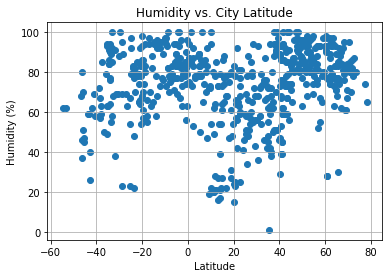

In [23]:
x_lat=new_weather_df['Lat']
y_humidity=new_weather_df['Humidity']

plt.scatter(x_lat,y_humidity)
plt.title('Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.savefig('../output_data/Humidity_Lat_Scatter.png')

print(f'The plot below displays humidity levels in comparison \nto city latitude. From this visual, we can conclude there \nis no ovious trend between the two variables.')

The plot below displays the cloudiness level compared 
to city latitude. There is no obvious trend between the 
two variables.


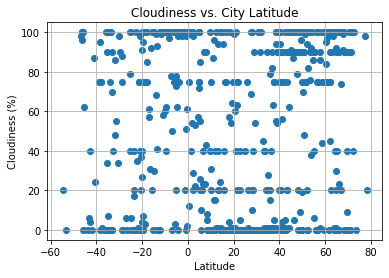

In [24]:
x_lat=new_weather_df['Lat']
y_cloudiness=new_weather_df['Cloudiness']

plt.scatter(x_lat,y_cloudiness)
plt.title('Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.savefig('../output_data/Cloudiness_Lat_Scatter.png')

print(f'The plot below displays the cloudiness level compared \nto city latitude. There is no obvious trend between the \ntwo variables.')

## Latitude vs. Wind Speed Plot

The plot below compares city latitude and wind speed. 
There is no obivious trend between the two variables.


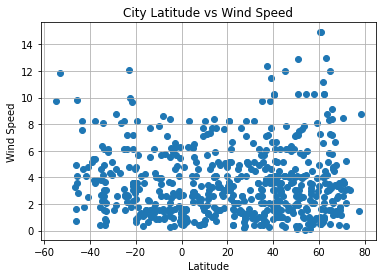

In [25]:
x_lat=new_weather_df['Lat']
y_windspeed=new_weather_df['Wind Speed']

plt.scatter(x_lat,y_windspeed)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.savefig('../output_data/WindSpeed_Lat_Scatter.png')

print(f'The plot below compares city latitude and wind speed. \nThere is no obivious trend between the two variables.')

## Linear Regression

In [26]:
northern_filter=new_weather_df.loc[:,'Lat']>=0
n_df=new_weather_df.loc[northern_filter,:]
n_df.head()
n_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,4.070000e+02
mean,38.494962,14.615717,275.701450,72.776413,50.103194,3.696093,1.612054e+09
std,20.057838,87.756511,18.377181,19.735858,41.954692,2.723783,9.924360e+01
min,0.392500,-179.166700,229.250000,1.000000,0.000000,0.050000,1.612053e+09
25%,21.452950,-69.731350,264.675000,62.000000,1.000000,1.540000,1.612054e+09
50%,40.598200,20.134700,277.590000,78.000000,54.000000,3.090000,1.612054e+09
75%,54.638800,89.372050,291.875000,87.000000,90.500000,5.070000,1.612054e+09
max,78.218600,179.316700,302.150000,100.000000,100.000000,14.920000,1.612054e+09


In [27]:
southern_filter=new_weather_df.loc[:,'Lat']<0
s_df=new_weather_df.loc[southern_filter,:]
s_df.head()
s_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,1.800000e+02
mean,-20.562186,31.682709,296.370000,76.033333,55.827778,3.694056,1.612054e+09
std,13.659158,93.675215,4.505657,16.355991,41.425417,2.462929,9.360993e+01
min,-54.800000,-175.200000,284.150000,22.000000,0.000000,0.280000,1.612054e+09
25%,-33.012600,-50.307525,292.552500,66.000000,4.000000,1.597500,1.612054e+09
50%,-20.083350,27.401300,297.150000,79.000000,69.000000,3.190000,1.612054e+09
75%,-8.605225,122.966700,299.445000,89.000000,100.000000,5.005000,1.612054e+09
max,-0.193400,175.700000,308.150000,100.000000,100.000000,12.060000,1.612054e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

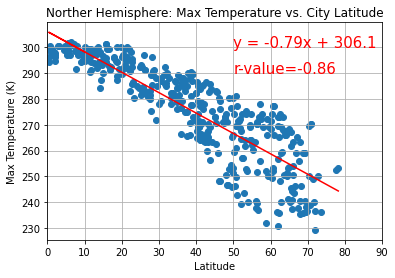

In [28]:
x_lat=n_df['Lat']
y_maxtemp=n_df['Max Temp']
                                   
plt.scatter(x_lat,y_maxtemp)
plt.title('Norther Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,300),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,290),fontsize=15,color="red")

plt.savefig('../output_data/Northern_MaxTemp_Lat_Reg.png')

n_temp=intercept

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

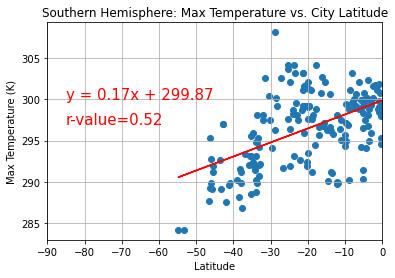

In [29]:
x_lat=s_df['Lat']
y_maxtemp=s_df['Max Temp']
                                            
plt.scatter(x_lat,y_maxtemp)
plt.title('Southern Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-85,300),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-85,297),fontsize=15,color="red")

plt.savefig('../output_data/Southern_MaxTemp_Lat_Reg.png')

s_temp=intercept

In [31]:
print(f'When comparing the Max Temp to Latitued for the Northern \nand Southern Hemispheres, the expected temperatures at \nthe equator ar {round(n_temp),2}K and {round(s_temp),2}K. \nFrom these conclusions, we can assume the Max Temp at \nthe equator is close to {round((n_temp+s_temp)/2,2)}K.')






When comparing the Max Temp to Latitued for the Northern 
and Southern Hemispheres, the expected temperatures at 
the equator ar (306.0, 2)K and (300.0, 2)K. 
From these conclusions, we can assume the Max Temp at 
the equator is close to 302.99K.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

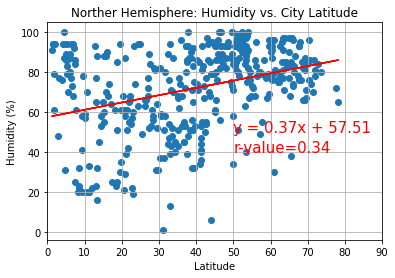

In [22]:
x_lat=n_df['Lat']
y_humidity=n_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Norther Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,40),fontsize=15,color="red")
plt.savefig('../output_data/Northern_Humidity_Lat_Reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

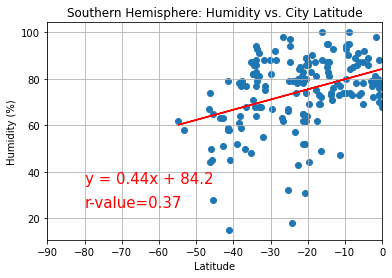

In [24]:
x_lat=s_df['Lat']
y_humidity=s_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Southern Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,35),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,25),fontsize=15,color="red")
plt.savefig('../output_data/Southern_Humidity_Lat_Reg.png')

In [32]:
print(f'Based on the regression of Humdity and Latitude for the Northern \nand Southern Hempispheres, there does not seem to be a strong \nrelationship between the variables.')
      
      
      

Based on the regression of Humdity and Latitude for the Northern 
and Southern Hempispheres, there does not seem to be a strong 
relationship between the variables.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

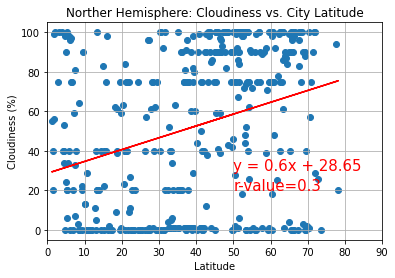

In [25]:
x_lat=n_df['Lat']
y_cloudiness=n_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Norther Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,20),fontsize=15,color="red")
plt.savefig('../output_data/Northern_Cloudiness_Lat_Reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

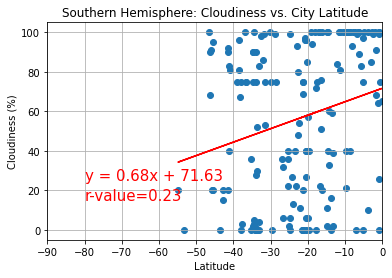

In [26]:
x_lat=s_df['Lat']
y_cloudiness=s_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Southern Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,25),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,15),fontsize=15,color="red")
plt.savefig('../output_data/Southern_Cloudiness_Lat_Reg.png')

In [36]:
print(f'The Cloudiness vs. Latitude regression for the Northern and \nSouthern Hemispheres would indicate there is not a strong \ncorrelation between the two variables.')      
      

The Cloudiness vs. Latitude regression for the Northern and 
Southern Hemispheres would indicate there is not a strong 
correlation between the two variables.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

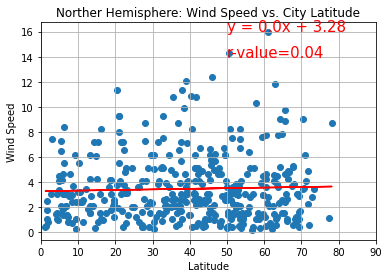

In [27]:
x_lat=n_df['Lat']
y_windspeed=n_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Norther Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,16),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,14),fontsize=15,color="red")
plt.savefig('../output_data/Northern_WindSpeed_Lat_Reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

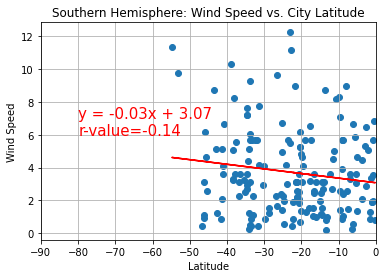

In [30]:
x_lat=s_df['Lat']
y_windspeed=s_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Southern Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,7),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,6),fontsize=15,color="red")
plt.savefig('../output_data/Southern_WindSpeed_Lat_Reg.png')


In [39]:
print(f'Based on the Wind Speed vs. Latitude regression for the Northern and \nSouthern Hemispheres, there does not appear to be a strong correlation \nbetween the two variables.')


Based on the Wind Speed vs. Latitude regression for the Northern and 
Southern Hemispheres, there does not appear to be a strong correlation 
between the two variables.
